# Logistic Regression Tutorial👨🏼‍🏫

In this tutorial, I implement Logistic Regression with Python. I build a Logistic Regression classifier to predict a tumour as malignant or benign. I train a binary classification model using Logistic Regression. The variable I’m going to be predicting can have one of the 2 values: 0 or 1.



**Terminology.**

Before we start with the analysis, it is important to understand what exactly we are trying to predict and what the information provided. “Benign” refers to a type of medical condition that is not cancerous or dangerous as opposed to “Malign”. The dataset contains 9 independent variables, each of them is a feature that is typically used in breast cancer analysis. 

- Clump thickness is a measure of the thickness of the cells in a tumor. Benign cells tend to be grouped in mono-layers, while cancerous cells tend to be in multiple layers.
- Uniformity of cell size and uniformity of cell shape are two characteristics that can be used to describe the appearance of cells under a microscope. Here we are checking the degree to which the cells in a sample are similar in size and shape.
- Marginal adhesion is the degree to which cells in a tissue sample adhere, or stick, to one another at the edges of the sample. Loss of adhesion might be a sign of malignancy.
- Single epithelial cell size is the size of individual cells in an epithelial tissue sample. Epithelial tissue is a type of tissue that covers the surface of the body and lines internal organs and structures. It is made up of cells that are tightly packed together and held in place by specialized junctions.
- Bare nuclei refers to cells in a tissue sample that are missing their cell membranes and cytoplasm, leaving only the nucleus visible.
- Bland chromatin is the appearance of the genetic material (chromatin) in the nucleus of a cell under a microscope. Chromatin is made up of DNA and proteins, and it contains the genetic information that controls the cell’s functions. When the chromatin in a cell’s nucleus is compact and uniform in appearance, it is said to be “bland.”
- Normal nucleoli are small, spherical structures found within the nucleus of a cell. They are composed of DNA, RNA, and proteins and are responsible for synthesizing ribosomes, which are the cellular structures that produce proteins. Nucleoli are usually visible under a microscope and can vary in size and appearance depending on the stage of the cell cycle and the cell’s function. In normal, healthy cells, nucleoli are usually small and have a distinct, well-defined border.
- Mitosis is the process of cell division that occurs in all living organisms. During mitosis, a single cell divides into two daughter cells, each of which contains a copy of the parent cell’s DNA. The process of mitosis is essential for the growth and repair of tissues and the production of new cells.
- Class contains the values 2 or 4 (‘malignant’ = 4 or ‘benign’ = 2).



**The Workflow.**

- Data collection & Inspection
- Descriptive Statistics
- Feature engineering
- Model development
- Evaluation and Vizualization

✏️**Import libraries.**

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

✏️**Import dataset.**

In [87]:
df= pd.read_csv('breast_cancer.csv') #read the dataset

✏️**Exploratory Data Analysis (EDA).**

In this section the dataset will be analyzed to come up with the main characteristics that could shed light on the nature of the data. The analysis will assist to find out which features are more crucial in predicting whether a sample is cancerous or not.

- view dimensions of dataset

In [88]:
df.shape

(683, 10)

We can see that there are 683 instances and 10 variables in the data set.

- preview the dataset

In [89]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


- view summary of dataset

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


- types of variables

In [91]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [92]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='o']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 10 numerical variables

The numerical variables are : ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']


In [93]:
# view the numerical variables
df[numerical].head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


- explore problems within numerical variables


In [94]:
# check missing values in numerical variables
df[numerical].isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

We can see that all the variables don't contain missing values.

- outliers in numerical variables

In [95]:
# view summary statistics in numerical variables
print(round(df[numerical].describe()),2)

       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count            683.0                    683.0                     683.0   
mean               4.0                      3.0                       3.0   
std                3.0                      3.0                       3.0   
min                1.0                      1.0                       1.0   
25%                2.0                      1.0                       1.0   
50%                4.0                      1.0                       1.0   
75%                6.0                      5.0                       5.0   
max               10.0                     10.0                      10.0   

       Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
count              683.0                        683.0        683.0   
mean                 3.0                          3.0          4.0   
std                  3.0                          2.0          4.0   
min                  1.0  

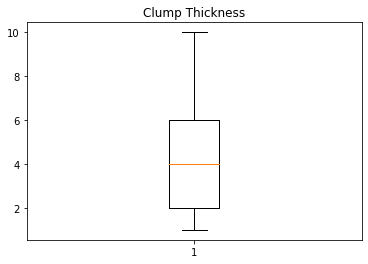

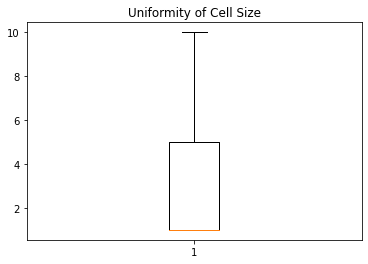

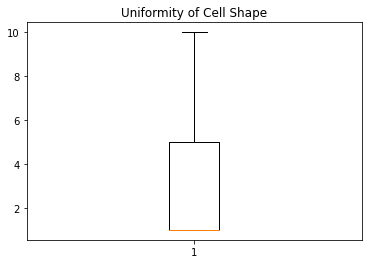

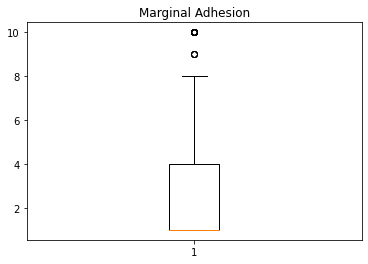

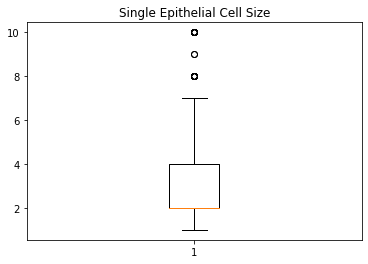

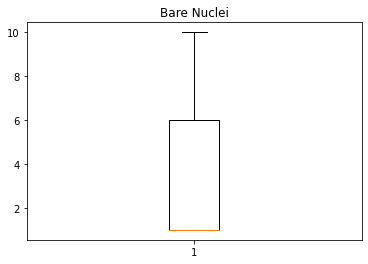

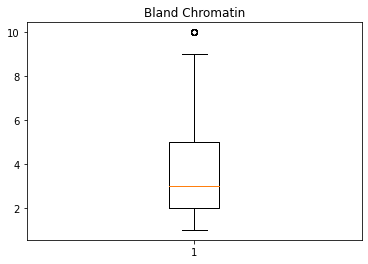

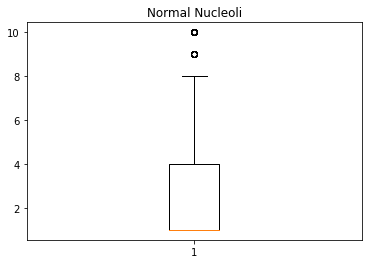

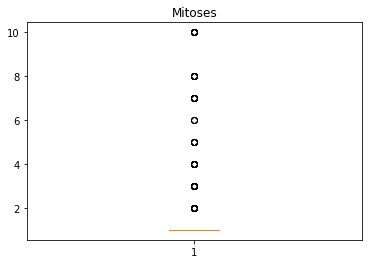

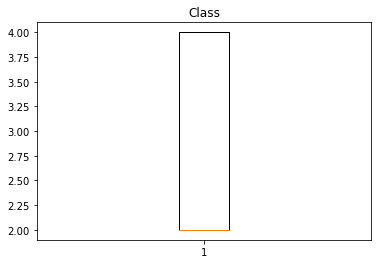

In [96]:
# draw boxplots to visualize outliers
for i in df.columns:
  plt.figure()
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

We note that 'Margin Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin','Normal Nucleoli' and 'Mitrose's have outliers.

- Check the distribution of variables

Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then we can do Extreme Value Analysis otherwise if they are skewed, we can find IQR (Interquantile range).



<AxesSubplot:xlabel='Mitoses', ylabel='Density'>

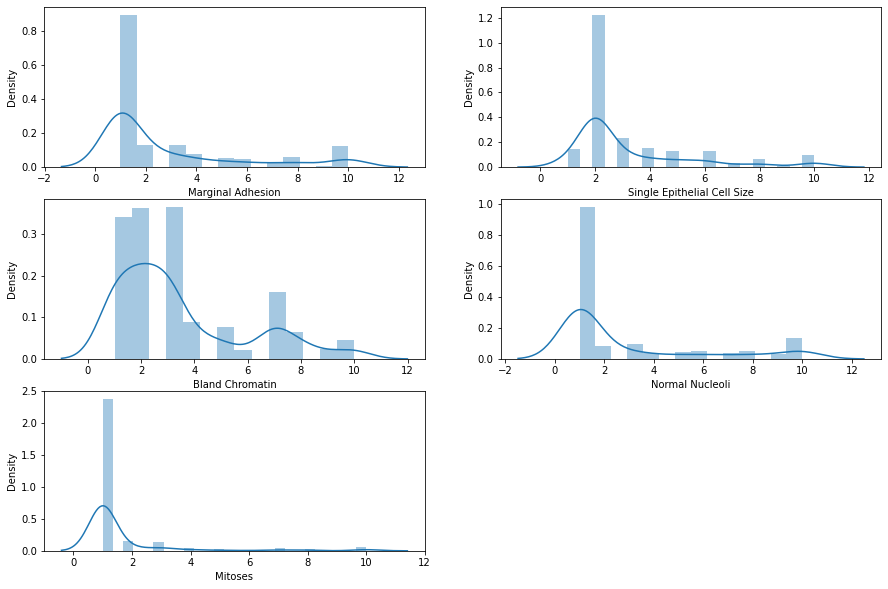

In [97]:
#plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(3, 2, 1)
sns.distplot(df['Marginal Adhesion'])


plt.subplot(3, 2, 2)
sns.distplot(df['Single Epithelial Cell Size'])


plt.subplot(3, 2, 3)
sns.distplot(df['Bland Chromatin'])


plt.subplot(3, 2, 4)
sns.distplot(df['Normal Nucleoli'])

plt.subplot(3, 2, 5)
sns.distplot(df['Mitoses'])


We can see that all the five variables are skewed. So, we can use interquantile range to find outliers. However, Logistic Regression models are not much impacted due to the presence of outliers because the sigmoid function tapers the outliers. But the presence of extreme outliers may somehow affect the performance of the model and lowering the performance. In our case, the extreme values being few, we will not concern ourselves with this aspect in the analysis performed.

Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

✏️**Define dependent and independent variables and then split the data into a training set and testing set.**

- We will replace the value 2 with 0 and the value 4 with 1 in the class column. The value 1 will indicate malignant cancer and 0 will indicate benign cancer.


In [98]:
df=df.replace({'Class':{4:1, 2:0}})

In [99]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


- Declare feature vector and target variable.

In [100]:
y= df['Class'] #target variable
x= df.drop(['Class'], axis=1)#feature vector

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

- Split data into separate training and test set.

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

- Check the shape of x_train and x_test.

In [102]:
x_train.shape, x_test.shape

((546, 9), (137, 9))

- Check the shape of x_train and x_test.

In [103]:
y_train.shape, y_test.shape

((546,), (137,))

✏️**Fit the logistic regression model.**

In [104]:
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)
print("The intercept b0= ", modelLogistic.intercept_)
print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [-10.7085957]
The coefficient b1=  [[ 0.61150491 -0.09235674  0.36855771  0.40941019  0.10563669  0.31829592
   0.53309155  0.28652111  0.39741121]]


✏️**Evaluate the model using a confusion matrix.**

- Create a confusion matrix.

In [105]:
y_pred= modelLogistic.predict(x_test)
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', ConfusionMatrix)
print('\nTrue Positives(TP) = ', ConfusionMatrix[0,0])
print('\nTrue Negatives(TN) = ', ConfusionMatrix[1,1])
print('\nFalse Positives(FP) = ', ConfusionMatrix[0,1])
print('\nFalse Negatives(FN) = ', ConfusionMatrix[1,0])

Confusion matrix

 [[84  2]
 [ 3 48]]

True Positives(TP) =  84

True Negatives(TN) =  48

False Positives(FP) =  2

False Negatives(FN) =  3


- Display the visualization of the Confusion Matrix.

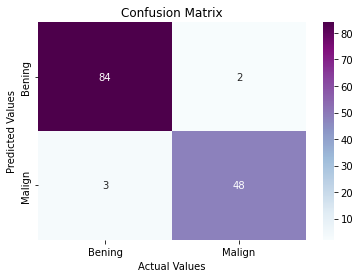

In [106]:
ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values');
ax.xaxis.set_ticklabels(['Bening','Malign'])
ax.yaxis.set_ticklabels(['Bening','Malign'])
plt.show()

- Classification report.


In [107]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        86
           1       0.96      0.94      0.95        51

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



- The support is the number of occurrences in each class.
- Recall=TP/(TP+FN). Recall is also called Sensitivity.
- Precision=TP/(TP+FP)
- f1-score is the weighted harmonic mean of precision and recall.
- Specificity = TN / (TN + FP)

- Classification error.

In [108]:
TP = ConfusionMatrix[0,0]
TN = ConfusionMatrix[1,1]
FP = ConfusionMatrix[0,1]
FN = ConfusionMatrix[1,0]
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0365


- Check for overfitting and underfitting.

In [109]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(modelLogistic.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(modelLogistic.score(x_test, y_test)))


Training set score: 0.9744
Test set score: 0.9635


The training-set accuracy score is 0.9725 while the test-set accuracy is 0.9562. These two values are quite comparable. So, there is no problem with overfitting.

✏️**Predict results.**

- predict the class for observetion from test set.

In [110]:
y_pred_class= modelLogistic.predict(x_test)

In [111]:
y_pred_class

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0], dtype=int64)

- predict the probabilities of two classes: 0 and 1

In [112]:
y_pred_prob = modelLogistic.predict_proba(x_test)
y_pred_prob

array([[9.81572677e-01, 1.84273227e-02],
       [9.98409121e-01, 1.59087866e-03],
       [7.67680601e-05, 9.99923232e-01],
       [9.84262473e-01, 1.57375272e-02],
       [9.99201355e-01, 7.98645116e-04],
       [5.70230304e-01, 4.29769696e-01],
       [9.99281360e-01, 7.18639660e-04],
       [5.23683768e-05, 9.99947632e-01],
       [8.16106582e-01, 1.83893418e-01],
       [5.47911243e-02, 9.45208876e-01],
       [7.52089956e-03, 9.92479100e-01],
       [9.97291870e-01, 2.70813005e-03],
       [9.81023001e-01, 1.89769987e-02],
       [3.56265399e-03, 9.96437346e-01],
       [9.99201355e-01, 7.98645116e-04],
       [9.98409121e-01, 1.59087866e-03],
       [9.49070048e-01, 5.09299523e-02],
       [9.00073507e-06, 9.99990999e-01],
       [2.35905097e-04, 9.99764095e-01],
       [9.74520723e-01, 2.54792766e-02],
       [4.34474884e-08, 9.99999957e-01],
       [2.01320607e-02, 9.79867939e-01],
       [9.97071616e-01, 2.92838434e-03],
       [9.98528925e-01, 1.47107455e-03],
       [9.974321

❗️ Observations:

- In each row, the numbers sum to 1.
- There are 2 columns which correspond to 2 classes: 0 and 1.
    - Class 0 - predicted probability for benign cancer.
    - Class 1 - predicted probability for malignant cancer.

- Importance of predicted probabilities: we can rank the observations by probability of benign cancer or malignant cancer.

- Classification threshold level:
   - There is a classification threshold level of 0.5.
   - Class 1 - probability of malignant cancer is predicted if probability > 0.5.
   - Class 0 - probability of benign cancer is predicted if probability < 0.5.


**📚References.**

- https://www.kaggle.com/datasets/marshuu/breast-cancer.
- Johns Hopkins University, 2023, Glossary of Breast Cancer Terms, <https://pathology.jhu.edu/breast/glossary>.
- Sarkar, S K, Nag, A, 2017, Identifying Patients at Risk of Breast Cancer through Decision Trees, viewed 15 January, 2023, <https://www.researchgate.net/publication/325868350_Identifying_Patients_at_Risk_of_Breast_Cancer_through_Decision_Trees>.
